#General description of the code:

*  Import Libraries: First, required libraries such as Pandas for working with data, NumPy for scientific calculations and Matplotlib for visualization are imported.

*  Load Data: Data is loaded from a CSV file using pd.read_csv.

*  Data Exploration: A step is dedicated to data analysis. df.info() displays brief details of the data.

*  Data Visualization: Data is visualized using df.plot. These images are displayed in different columns such as 'ftse', 'spx', and 'nikkei'.

*  Data Preprocessing: In this step, the dates are converted to datetime format and then the 'date' column is set as the index.

*  Resampling: Data is changed to different frequencies using resample. For example, they change to daily, yearly and monthly frequency.

*  Handling Missing Data: Empty values in the data are filled using fillna, rolling, and interpolate respectively.

*  Probability Plot: A probability plot is drawn to examine the distribution of data.

Through these steps, the defined code helps to analyze and clean financial market and time series data to extract and visualize important information from the data.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

In [6]:
# Load the financial data from a CSV file
df = pd.read_csv('/content/Price.csv')
df

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [7]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [8]:
# Create a copy of the original DataFrame
df_c = df.copy()

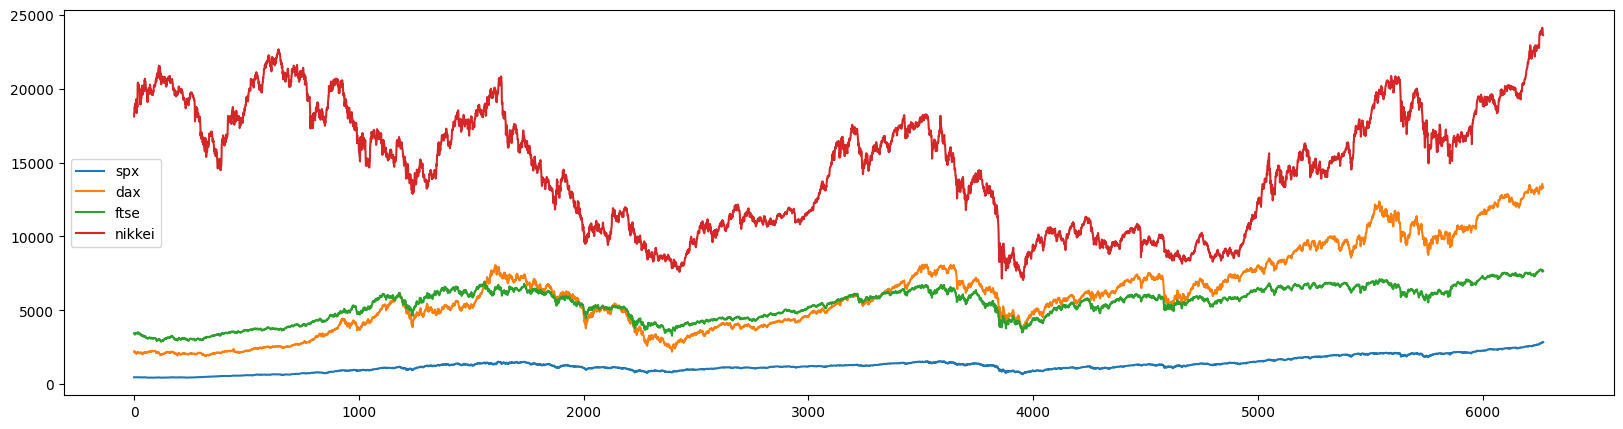

In [9]:
# Plot the entire DataFrame with a specified figure size
df.plot(figsize=(20, 5))
plt.show()

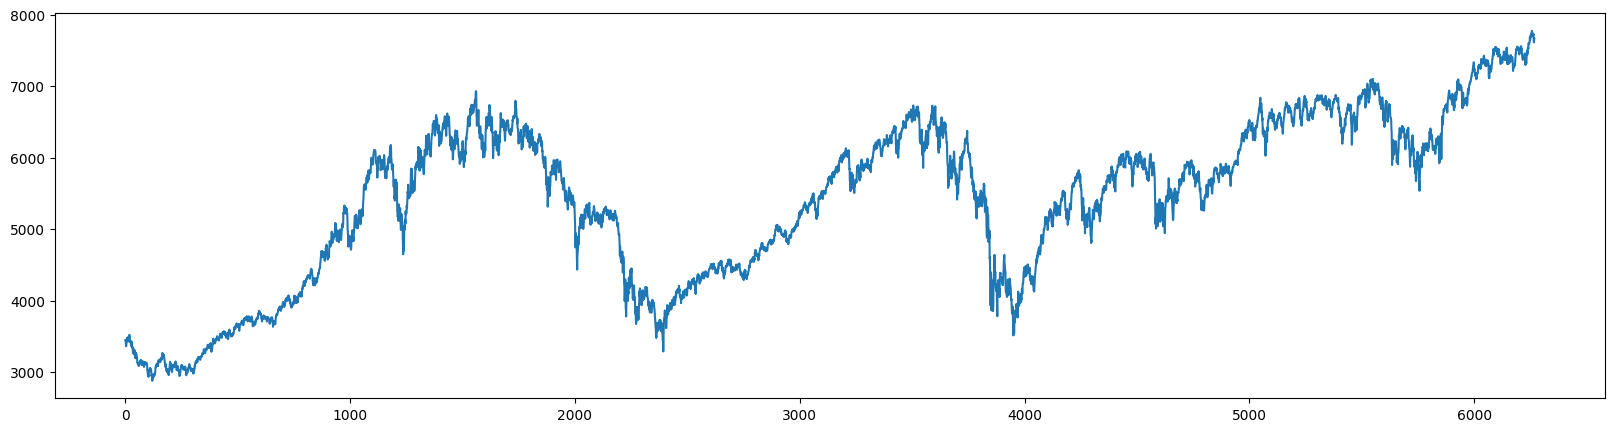

In [10]:
# Plot the 'ftse' column separately
df['ftse'].plot(figsize=(20, 5))
plt.show()

In [11]:
# Convert the 'date' column to datetime format with 'dayfirst' parameter
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [12]:
# Display information about the DataFrame after datetime conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [13]:
# Display the first few rows of the DataFrame
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
# Set the 'date' column as the DataFrame index
df.set_index('date', inplace=True)

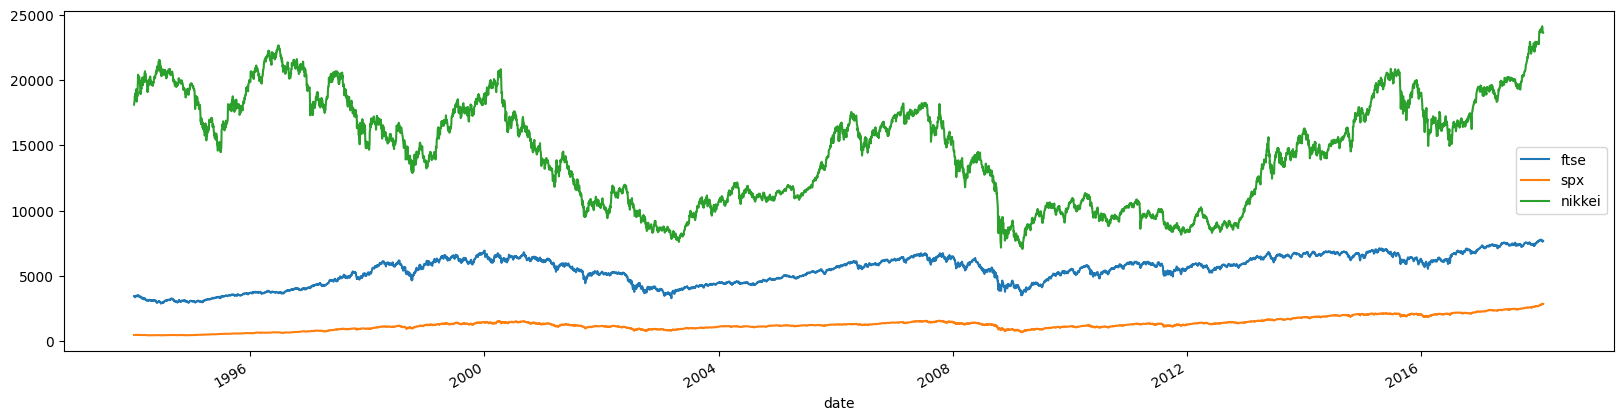

In [15]:
# Plot the 'ftse', 'spx', and 'nikkei' columns separately
df[['ftse', 'spx', 'nikkei']].plot(figsize=(20, 5))
plt.show()

In [16]:
# Check for missing values and display the count
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [17]:
# Resample the data to daily frequency and calculate the mean
df_day = df.resample('D').mean()

In [18]:
# Display the resulting daily data
df_day

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [20]:
# Resample the data to yearly frequency and calculate the sum
df_year = df.resample('Y').sum()
df_year

,spx,dax,ftse,nikkei
date,,,,
1994-12-31,117807.440000,542604.68,8.029240e+05,5107917.930
1995-12-31,140808.640000,555924.85,8.713797e+05,4514632.530
1996-12-31,175734.450000,673439.06,1.003176e+06,5518133.760
1997-12-31,227848.110000,971337.36,1.225021e+06,4795461.140
1998-12-31,283253.380000,1312047.37,1.470539e+06,4003081.340
1999-12-31,346409.120000,1396082.83,1.641454e+06,4392601.470
2000-12-31,370902.150000,1851320.44,1.656798e+06,4462013.980
2001-12-31,311577.633064,1465421.12,1.451340e+06,3161876.150
2002-12-31,259784.062614,1090129.96,1.199745e+06,2641141.200


In [21]:
# Resample the data to monthly frequency and calculate the sum
df_month = df.resample('M').sum()
df_month

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,8065.850000,36503.51,58435.110000,320186.81
1994-02-28,9427.710000,42473.93,67927.810000,394252.44
1994-03-31,10667.580000,48965.44,73740.690000,460945.92
1994-04-30,9395.050000,46313.44,65660.690000,415877.30
1994-05-31,9926.200000,48837.57,67876.350000,444471.36
...,...,...,...,...
2017-09-30,52333.386274,262070.21,154027.561320,418397.47
2017-10-31,56253.943546,286373.77,165179.954952,467308.01
2017-11-30,57062.808862,289506.24,163707.150164,495565.24


In [22]:
# Check for missing values in the daily data
df_day.isna().sum()

spx       2520
dax       2520
ftse      2520
nikkei    2520
dtype: int64

In [23]:
# Resample the data to business day frequency and calculate the mean
df_b = df.resample('B').mean()
df_b

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [24]:
# Display information about the business day data
df_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6269 non-null   float64
 1   dax     6269 non-null   float64
 2   ftse    6269 non-null   float64
 3   nikkei  6269 non-null   float64
dtypes: float64(4)
memory usage: 245.2 KB


In [26]:
# Check for missing values in the business day data
df_b.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [27]:
# Fill missing values in the 'spx' column using forward fill
df_b['spx'] = df_b['spx'].fillna(method='ffill')

In [28]:
# Check for missing values after forward filling
df_b.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [29]:
# Fill missing values in the 'ftse' column using backward fill
df_b['ftse'] = df_b['ftse'].fillna(method='bfill')

In [30]:
# Calculate a rolling mean of 'dax' over a 3-day window
df_b['dax'] = df_b['dax'].rolling(3, min_periods=1).mean()

In [31]:
# Interpolate missing values in the 'nikkei' column using spline interpolation with order 2
df_b['nikkei'] = df_b['nikkei'].interpolate(method='spline', order=2)

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [32]:
# Interpolate missing values in the 'dax' column using linear interpolation
df_b['dax'] = df_b['dax'].interpolate(method='linear')

In [33]:
# Fill any remaining missing values in the 'dax' column using backward fill
df_b['dax'] = df_b['dax'].fillna(method='bfill')

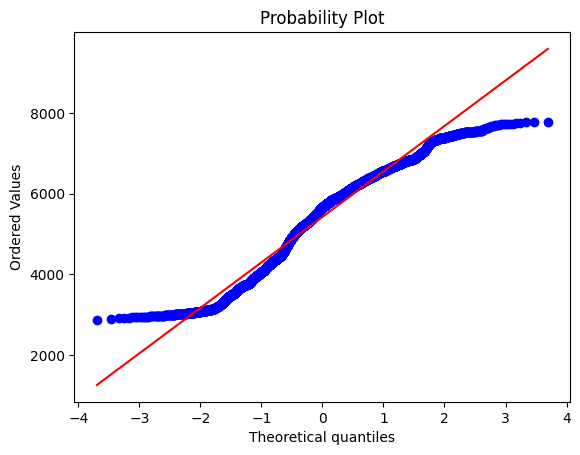

In [34]:
# Display a probability plot for the 'ftse' column
scipy.stats.probplot(df['ftse'], plot=pylab)
pylab.show()

توضیحات کلی کد:

Import Libraries: در ابتدا کتابخانه‌های مورد نیاز مانند Pandas برای کار با داده‌ها، NumPy برای محاسبات علمی و Matplotlib برای تصویرسازی وارد می‌شوند.

Load Data: داده‌ها از یک فایل CSV با استفاده از pd.read_csv بارگذاری می‌شوند.

Data Exploration: مرحله‌ای به تجزیه و تحلیل داده‌ها اختصاص داده می‌شود. df.info() جزئیات مختصری از داده‌ها را نشان می‌دهد.

Data Visualization: داده‌ها با استفاده از df.plot تصویرسازی می‌شوند. این تصاویر به تفکیک ستون‌های مختلف مانند 'ftse', 'spx', و 'nikkei' نمایش داده می‌شوند.

Data Preprocessing: در این مرحله، تاریخ‌ها به فرمت datetime تبدیل می‌شوند و سپس ستون 'date' به عنوان نمایه تعیین می‌شود.

Resampling: داده‌ها با استفاده از resample به فرکانس‌های مختلفی تغییر تایم فریم داده می‌شوند. به عنوان مثال، به تایم فریم های روزانه، سالیانه و ماهیانه تغییر می‌کنند.

Handling Missing Data: مقادیر خالی در داده‌ها با استفاده از fillna, rolling, و interpolate به ترتیب پر می‌شوند.

Probability Plot: یک نمودار احتمال رسم می‌شود تا توزیع داده‌ها بررسی شود.

از طریق این مراحل، کد معین شده به تحلیل و پاکسازی داده‌های بازار مالی و تایم سریز کمک می‌کند تا اطلاعات مهمی از داده‌ها استخراج شود و به تصویر کشیده شود.